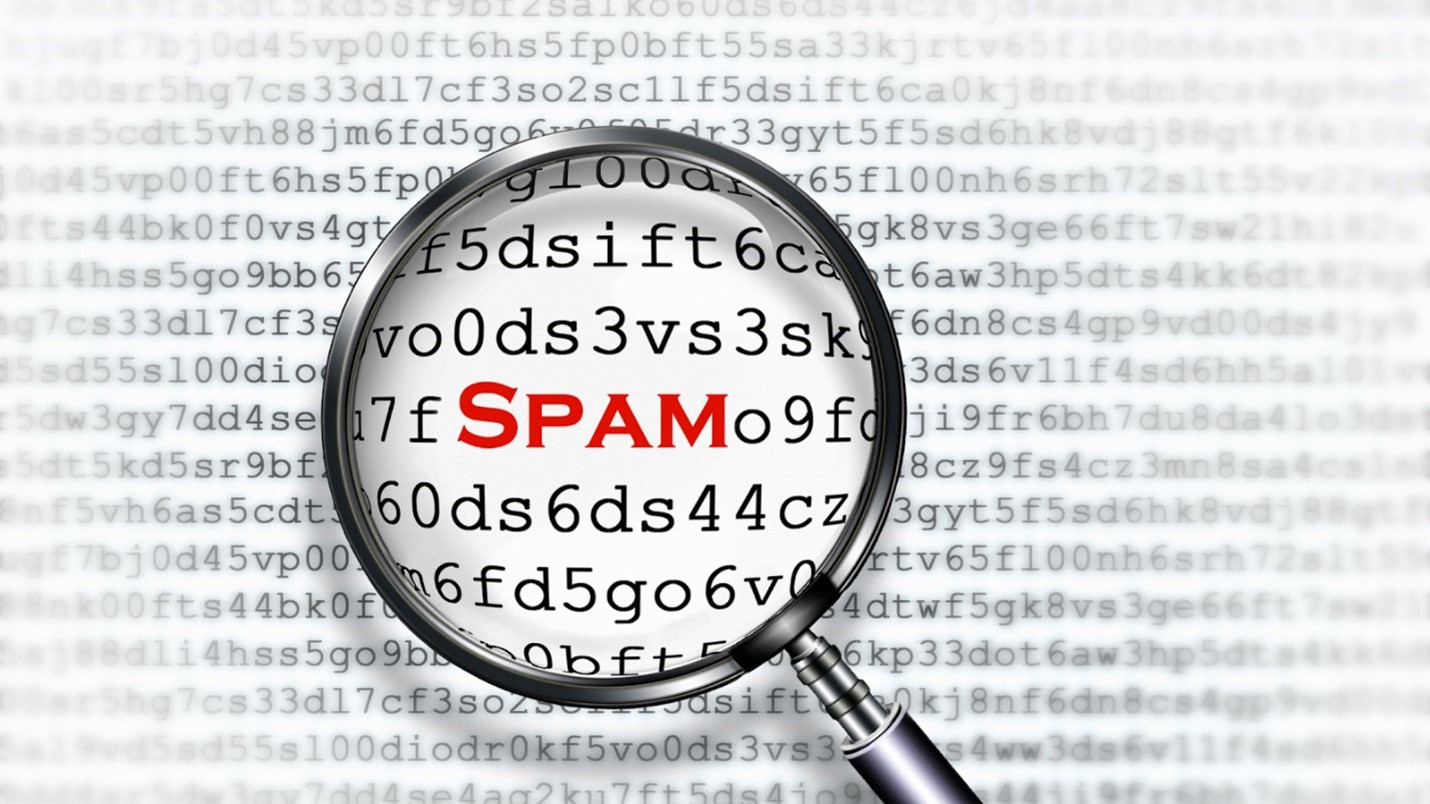
# **Introduction**
The Spam Collection is a set of tagged messages that have been collected for spam research. It contains one set of messages in English, tagged acording being ham or spam.

### **Problem Statement**

The project aims to determine the best Naive Bayes Classifier model that can be used to predict message ham/spam while training and testing the dataset with different split and come up with the best split.


### **Objective**
To determine the split that produces the best accuracy

### **Metrics of success**
* Read and explore the given dataset.

* Finding and dealing with outliers, anomalies, and missing data within the dataset.

* Performing EDA.

* Performing Naive Bayes classification while splitting the datasets differently 80-20, 70-30, 60-40,.

* Applying optimization techniques.


## **Data Understanding**

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# getting the dataset
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data

--2022-06-25 03:19:36--  https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 702942 (686K) [application/x-httpd-php]
Saving to: ‘spambase.data’

spambase.data       100%[===================>] 686.47K  --.-KB/s    in 0.06s   

2022-06-25 03:19:36 (10.6 MB/s) - ‘spambase.data’ saved [702942/702942]



In [3]:
# reading datasets
spam = pd.read_csv('spambase.data', header=None)
# previewing the top of the dataset
spam.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [4]:
#previewing last five rows
spam.tail()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,...,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,...,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [5]:
#columns and rows 
spam.shape

(4601, 58)

## **Data Preparation and Cleaning**

**1. Validity check**

In [6]:
#columns
spam.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57],
           dtype='int64')

**2. Accuracy check**

In [7]:
#datatypes
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4601 non-null   float64
 1   1       4601 non-null   float64
 2   2       4601 non-null   float64
 3   3       4601 non-null   float64
 4   4       4601 non-null   float64
 5   5       4601 non-null   float64
 6   6       4601 non-null   float64
 7   7       4601 non-null   float64
 8   8       4601 non-null   float64
 9   9       4601 non-null   float64
 10  10      4601 non-null   float64
 11  11      4601 non-null   float64
 12  12      4601 non-null   float64
 13  13      4601 non-null   float64
 14  14      4601 non-null   float64
 15  15      4601 non-null   float64
 16  16      4601 non-null   float64
 17  17      4601 non-null   float64
 18  18      4601 non-null   float64
 19  19      4601 non-null   float64
 20  20      4601 non-null   float64
 21  21      4601 non-null   float64
 22  

**3. Completeness check**

In [8]:
#Checking for nulls
spam.isnull().sum().sum()

0

**4. Consistency check**

In [9]:
#checking for duplicates
spam.duplicated().sum()

391

In [10]:
# dropping duplicates
spam_base = spam.drop_duplicates()

spam_base.duplicated().sum()

0

**5. Uniformity check**

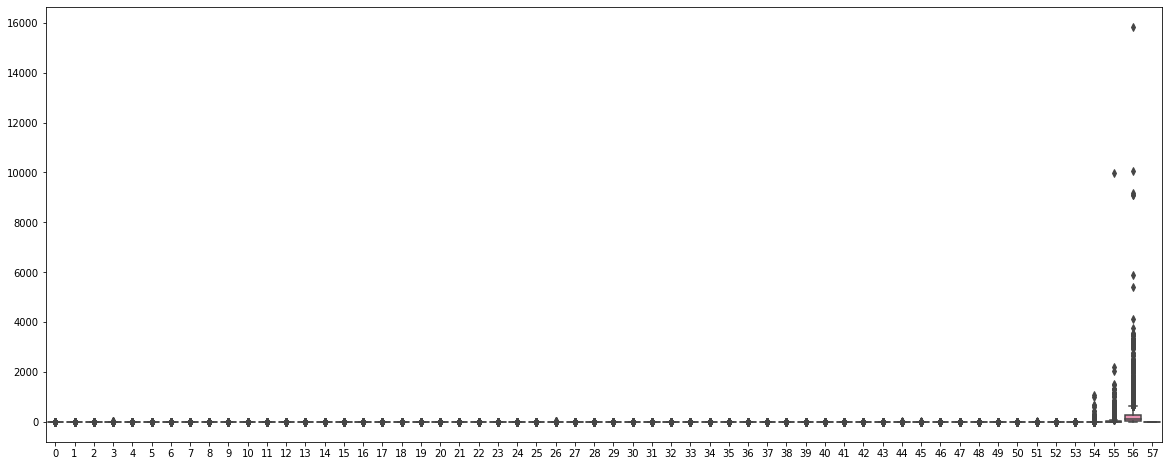

In [11]:
#checking for outliers
sns.boxplot(data=spam_base)
plt.gcf().set_size_inches(20, 8)

We have outliers that are concentrated on column 54 to 56

In [12]:
# dealing with the outliers using quantiles
Q1 = spam_base.quantile(0.25)
Q3 = spam_base.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range 
spm = spam_base[~((spam_base < (Q1 - 1.5 * IQR)) | (spam_base > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
print(spm.shape)

# Printing the shape of our old dataset
print(spam_base.shape)

(114, 58)
(4210, 58)


If an action is taken on the outliers we can see from above that we are left with very little data. This shows these outliers are crucial and important in our dataset so will continue to use them

In [13]:
spam_base.shape

(4210, 58)

## **Exploratory Data Analysis**

### **1. Univariate Analysis**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f137b62dcd0>,
      dtype=object)

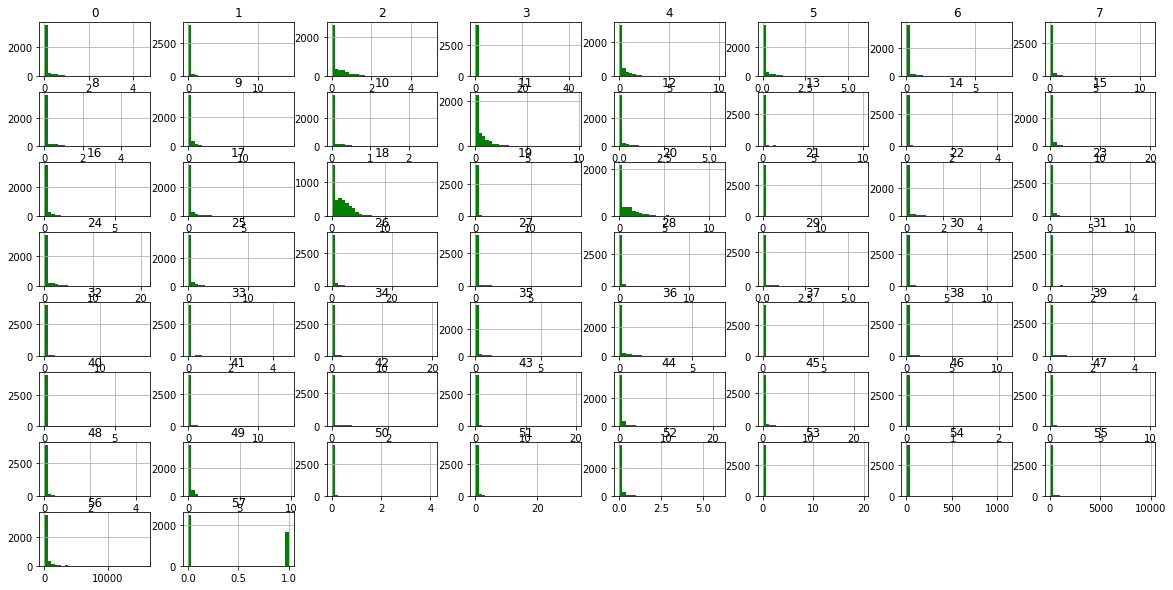

In [14]:
#Distribution plot
spam_base.hist(bins = 30, figsize = (20,10), color = 'g')

Our dataset is skewed

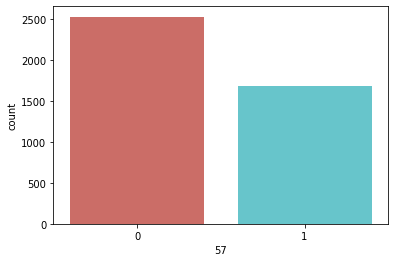

In [15]:
#target counts visual
sns.countplot(x=57,data=spam_base, palette='hls')

### **Multivariate Analysis**

In [16]:
spam_base.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,4210.0,0.104366,0.300005,0.0,0.0000,0.000,0.00000,4.540
1,4210.0,0.112656,0.454260,0.0,0.0000,0.000,0.00000,14.280
2,4210.0,0.291473,0.515719,0.0,0.0000,0.000,0.44000,5.100
3,4210.0,0.063078,1.352487,0.0,0.0000,0.000,0.00000,42.810
4,4210.0,0.325321,0.687805,0.0,0.0000,0.000,0.41000,10.000
5,4210.0,0.096656,0.276030,0.0,0.0000,0.000,0.00000,5.880
6,4210.0,0.117475,0.397284,0.0,0.0000,0.000,0.00000,7.270
7,4210.0,0.108000,0.410282,0.0,0.0000,0.000,0.00000,11.110
8,4210.0,0.091860,0.282144,0.0,0.0000,0.000,0.00000,5.260
9,4210.0,0.248420,0.656638,0.0,0.0000,0.000,0.19000,18.180


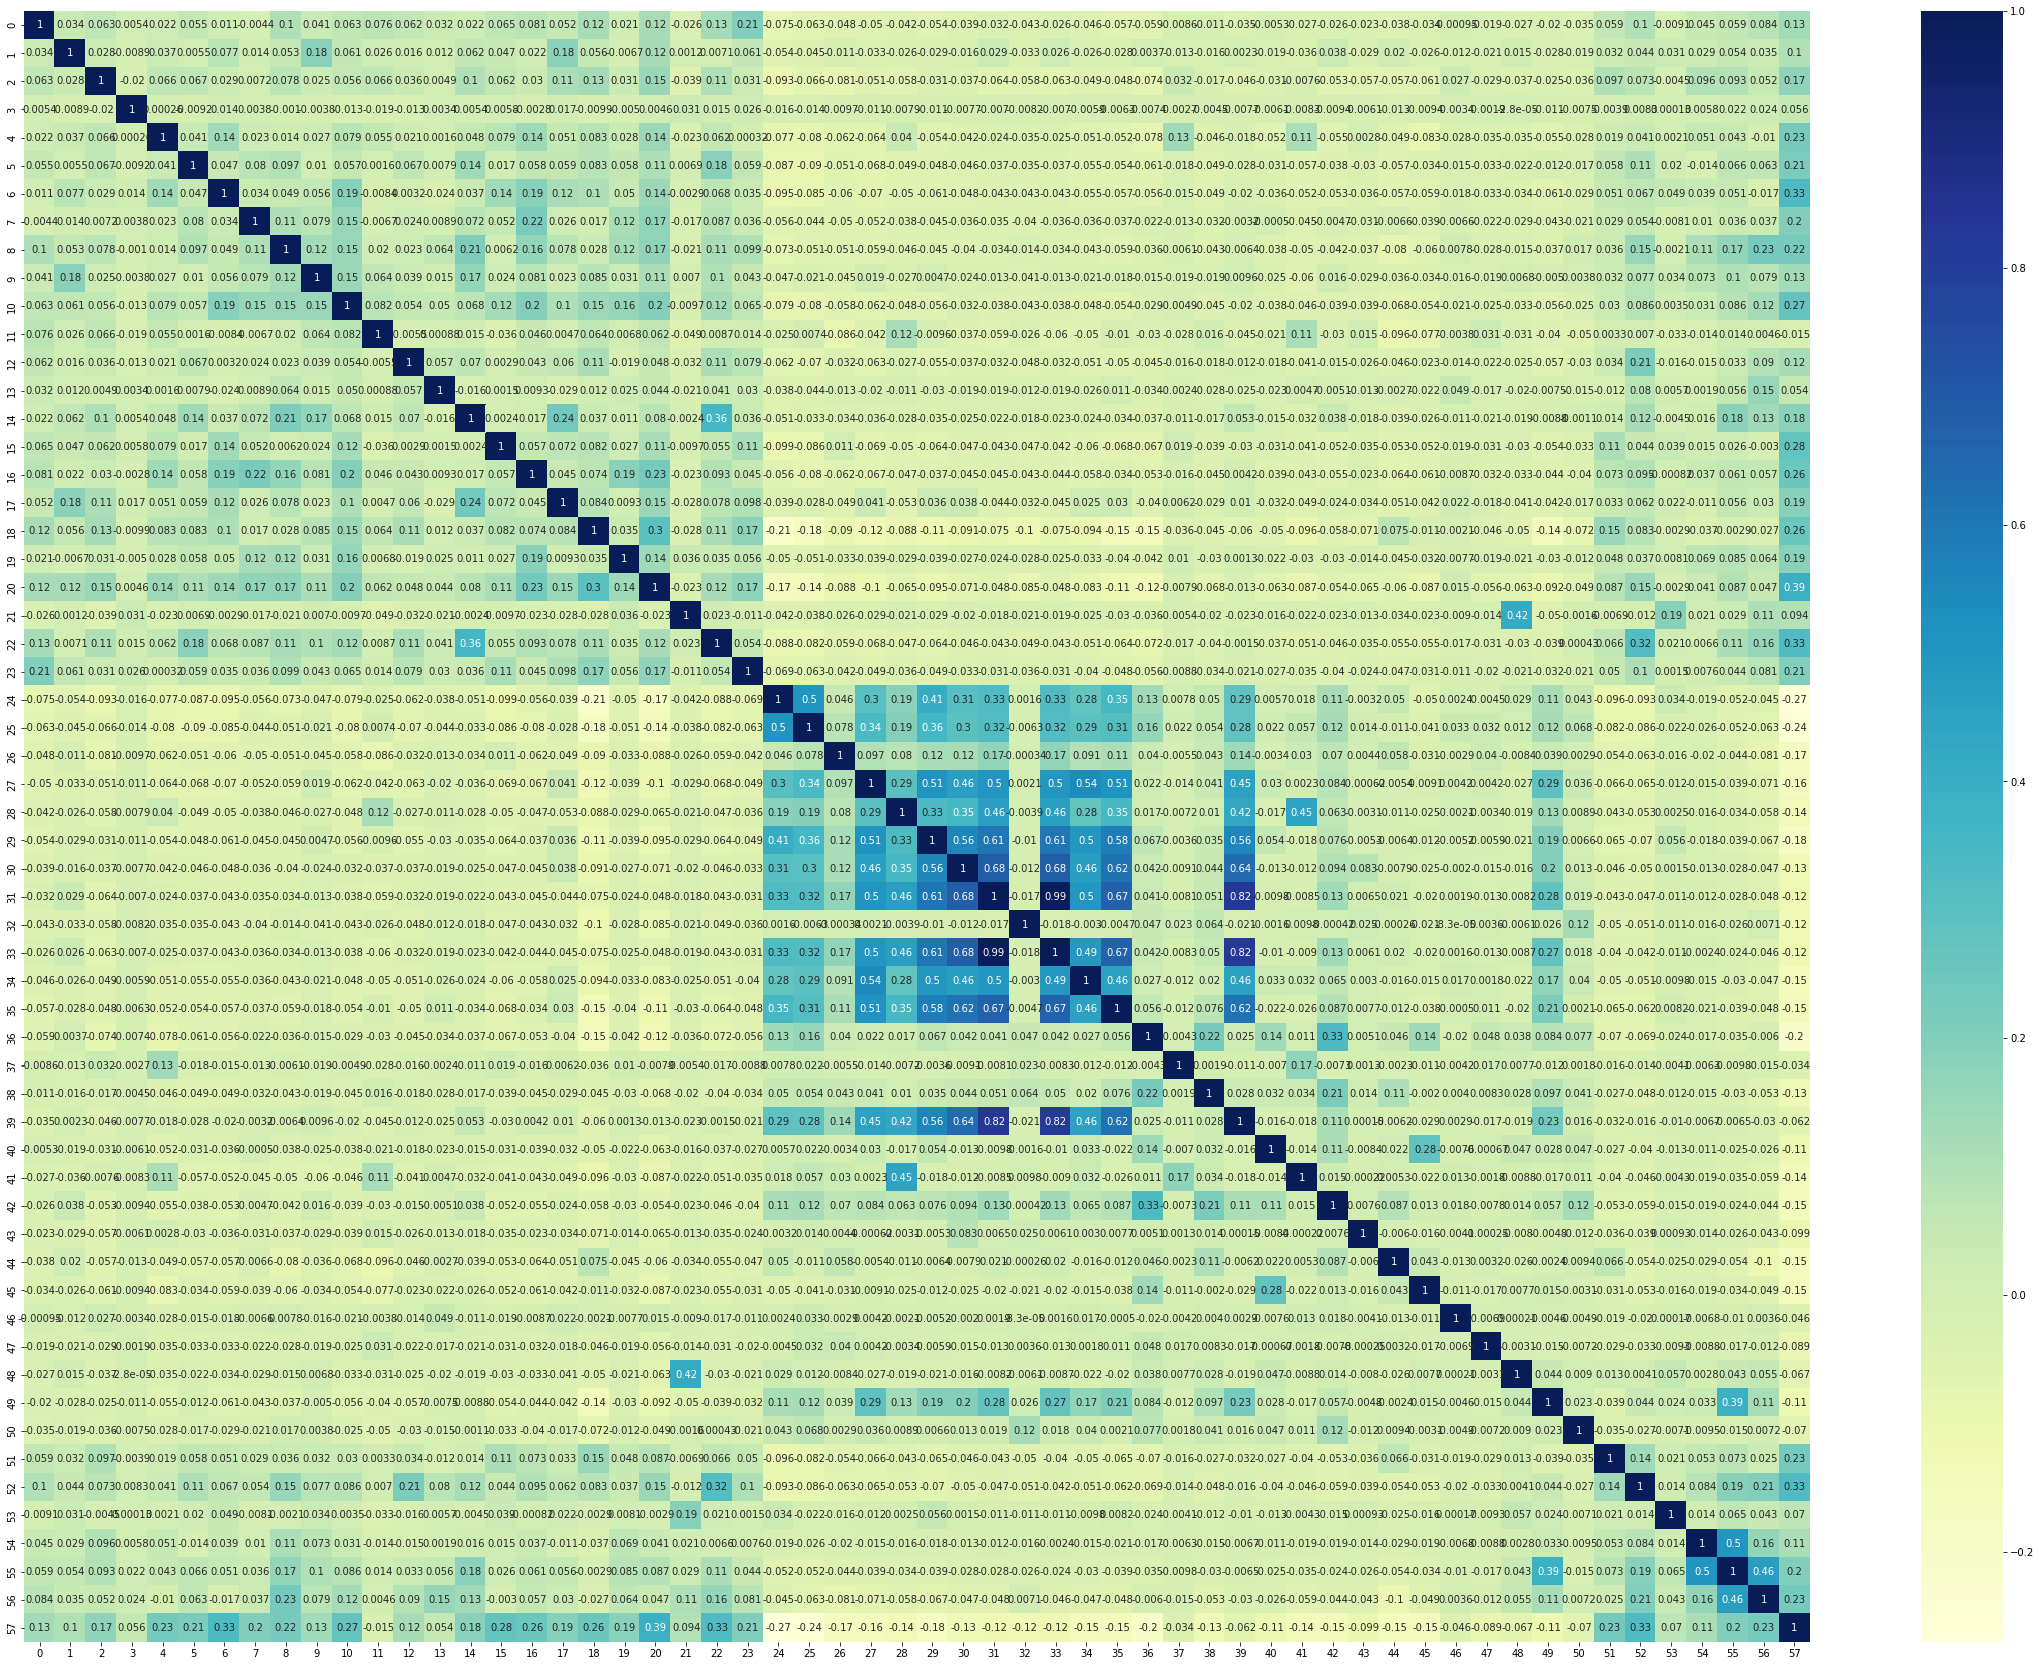

In [17]:
# Checking for corr
#plotting the correlation using a heatmap
fig, ax = plt.subplots(figsize=(40,30))  
sns.heatmap(spam_base.corr(), cmap="YlGnBu", annot=True)

## **Modeling**

In [18]:
# importing the required libraries
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [19]:
spam_base.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57],
           dtype='int64')

In [20]:
#Preprocessing
x = spam_base[[0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56]]
y = spam_base[57]

In [21]:
#Scaling our dataset
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

X = std.fit_transform(x)

## **1. 80:20 set**

In [22]:
# Splitting our data into 80% training set and 20% test set
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

1. Gaussian

In [23]:
# Training our model
# 
clf = GaussianNB()  
model = clf.fit(X_train, y_train) 

In [24]:
# Predictions 

y_pred = clf.predict(X_test)
y_pred

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,

In [25]:
# Evaluating the Algorithm

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[371 138]
 [ 15 318]]


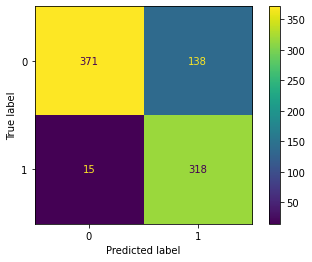

In [26]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test)
plt.show()

In [27]:
#Accuracy report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.73      0.83       509
           1       0.70      0.95      0.81       333

    accuracy                           0.82       842
   macro avg       0.83      0.84      0.82       842
weighted avg       0.86      0.82      0.82       842



Our model has an accuracy score of 82% which tell us that out of 100 our model was correct 82 times overall. Precision of our model shows it was able to predict class 0 of ham 92time and 70 time for class spam. Recall of our model tells us that the model was able to detect ham class 73times out of a 100 and for spam class  it was able to predict it 95times out of 100.

## **2. 70:30 set**

In [28]:
# Splitting our data into 70% training set and 30% test set
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

In [29]:
# Training our model
# 
clf = GaussianNB()  
model = clf.fit(X_train, y_train) 

In [30]:
# Predictions 

y_pred = clf.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [31]:
# Evaluating the Algorithm

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[556 205]
 [ 25 477]]


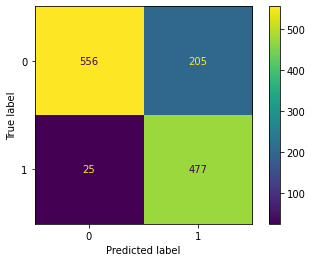

In [32]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test)
plt.show()

In [33]:
#Accuracy report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.73      0.83       761
           1       0.70      0.95      0.81       502

    accuracy                           0.82      1263
   macro avg       0.83      0.84      0.82      1263
weighted avg       0.85      0.82      0.82      1263



Our model has an accuracy score of 82% which tell us that out of 100 our model was correct 82 times overall. Precision of our model shows it was able to predict class 0 of ham 96time and 70 time for class spam. Recall of our model tells us that the model was able to detect ham class 73times out of a 100 and for spam class  it was able to predict it 95times out of 100.

## **3. 60:40 set**

In [34]:
# Splitting our data into 60% training set and 40% test set
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4) 

In [35]:
# Training our model
# 
clf = GaussianNB()  
model = clf.fit(X_train, y_train) 

In [36]:
# Predictions 

y_pred = clf.predict(X_test)
y_pred

array([1, 0, 0, ..., 1, 1, 1])

In [37]:
# Evaluating the Algorithm

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[763 255]
 [ 37 629]]


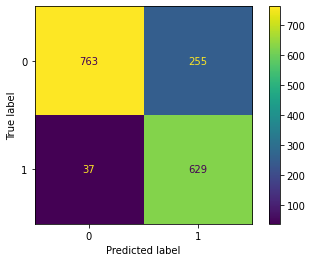

In [38]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test)
plt.show()

In [39]:
#Accuracy report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.75      0.84      1018
           1       0.71      0.94      0.81       666

    accuracy                           0.83      1684
   macro avg       0.83      0.85      0.83      1684
weighted avg       0.86      0.83      0.83      1684



Our model has an accuracy score of 83% which tell us that out of 100 our model was correct 83 times overall. Precision of our model shows it was able to predict class 0 of ham 95time and 71 time for class spam. Recall of our model tells us that the model was able to detect ham class 75times out of a 100 and for spam class  it was able to predict it 94times out of 100.

# **Conclusion**
1. The partitions were as follows along with their accuracy scores
          80:20 - Model accuracy score: 82%

          70:30 - Model accuracy score: 82%

          60:40 - Model accuracy score: 83%

This clearly shows that the best accuracy was attained from 60:40 partition